<a href="https://colab.research.google.com/github/mariusbiteau/Ecommerce-Customer-Segmentation/blob/main/EDA_Ecommerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Customer Segmentation for a Brazilian marketplace (Olist)

Olist would like you to provide its e-commerce teams with a customer segmentation that they can use on a daily basis for their communication campaigns.

### About the Dataset

The dataset includes 100k orders from 2016 to 2018 with several brands in Brazil. The data includes the following information: price, valuation, number of items, weight, description, geolocation...

### Project Goal

Help Olist teams understand the different types of users.
I will use unsupervised methods to group together clients with similar profiles. These categories can be used by the marketing team to better communicate.

For reasons of confidentiality, Olist does not provide a lot of data, so it is up to you to dig into the data you have and create the best features to exploit them.

Finally, your client, Olist, has specified his request as follows:

- The proposed segmentation must be exploitable and easy to use for the marketing team.
- You will evaluate how often the segmentation needs to be updated, in order to be able to quote for a maintenance contract.
- The code provided must comply with the PEP8 convention in order to be usable by Olist.


In [20]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import math
import json
import datetime as dt
import matplotlib.mlab as mlab
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
import folium
from google.colab import drive

## 1. Data Import

In [21]:
drive.mount('/content/drive')

df_dict = {
# Information on geolocation
  'geo': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_geolocation_dataset.csv'),
# Information on payments
  'payments': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_order_payments_dataset.csv'),
# Informations on orders
  'orders': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_orders_dataset.csv'),
# Informations on products
  'products': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_products_dataset.csv'),
# Infomations on sellers
  'sellers': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_sellers_dataset.csv'),
# Informations on customers
  'customers': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_customers_dataset.csv'),
# Informations on products reviews
  'reviews': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_order_reviews_dataset.csv'),
# Informations on items/products
  'items': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/olist_order_items_dataset.csv'),
# Informations on products categories
  'category': pd.read_csv('/content/drive/My Drive/OC_DataScientist/P5/product_category_name_translation.csv')
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Data Description

In [22]:
for name, df in df_dict.items():
    display(name)
    display(df.info())
    display(df.head())
    print('\n')

'geo'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


'payments'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'products'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'sellers'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'customers'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'reviews'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'items'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'category'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 3. Data Merging

I choose df_orders as the central dataframe, since it has 4 direct relationships and is the closest to the customers, the target I have to segment for this study.

I have a base of 99,441 orders. Throughout the file associations, I have to make sure that each associated dataset is on the same :

Associated files :

- df_customers: Number of observations identical to the commands. I would not make any changes.
- df_products : The number of observations is less than the number of observations of the commands. This does not pose any particular problem, I would not make any modification. This file will be previously associated with df_order_items.
- df_product_category_name_translation: Defines the translations of the categories, it will be useful for a better understanding of the personas. This file will be previously associated with df_products.

Files requiring a transformation before association :

- df_order_items: The number of observations is greater than the number of observations of the commands. This means that there can be several items per order. I need to define how to transform this set.
- df_order_payments : The number of observations is greater than the number of order observations. This means that there can be several payment methods for the same order. For example, one part in credit card, and another part in voucher. I have to define how to transform this game.
- df_order_reviews: The number of observations is higher than the number of order observations. This means that there may be more than one opinion on an order. I need to define how to transform this set.

Unassociated files :

- df_geolocation: This df brings in addition the latitude and longitude data, I will not use it in this study.
- df_sellers : This df indicates the location of the sellers, I will not use it in this study.


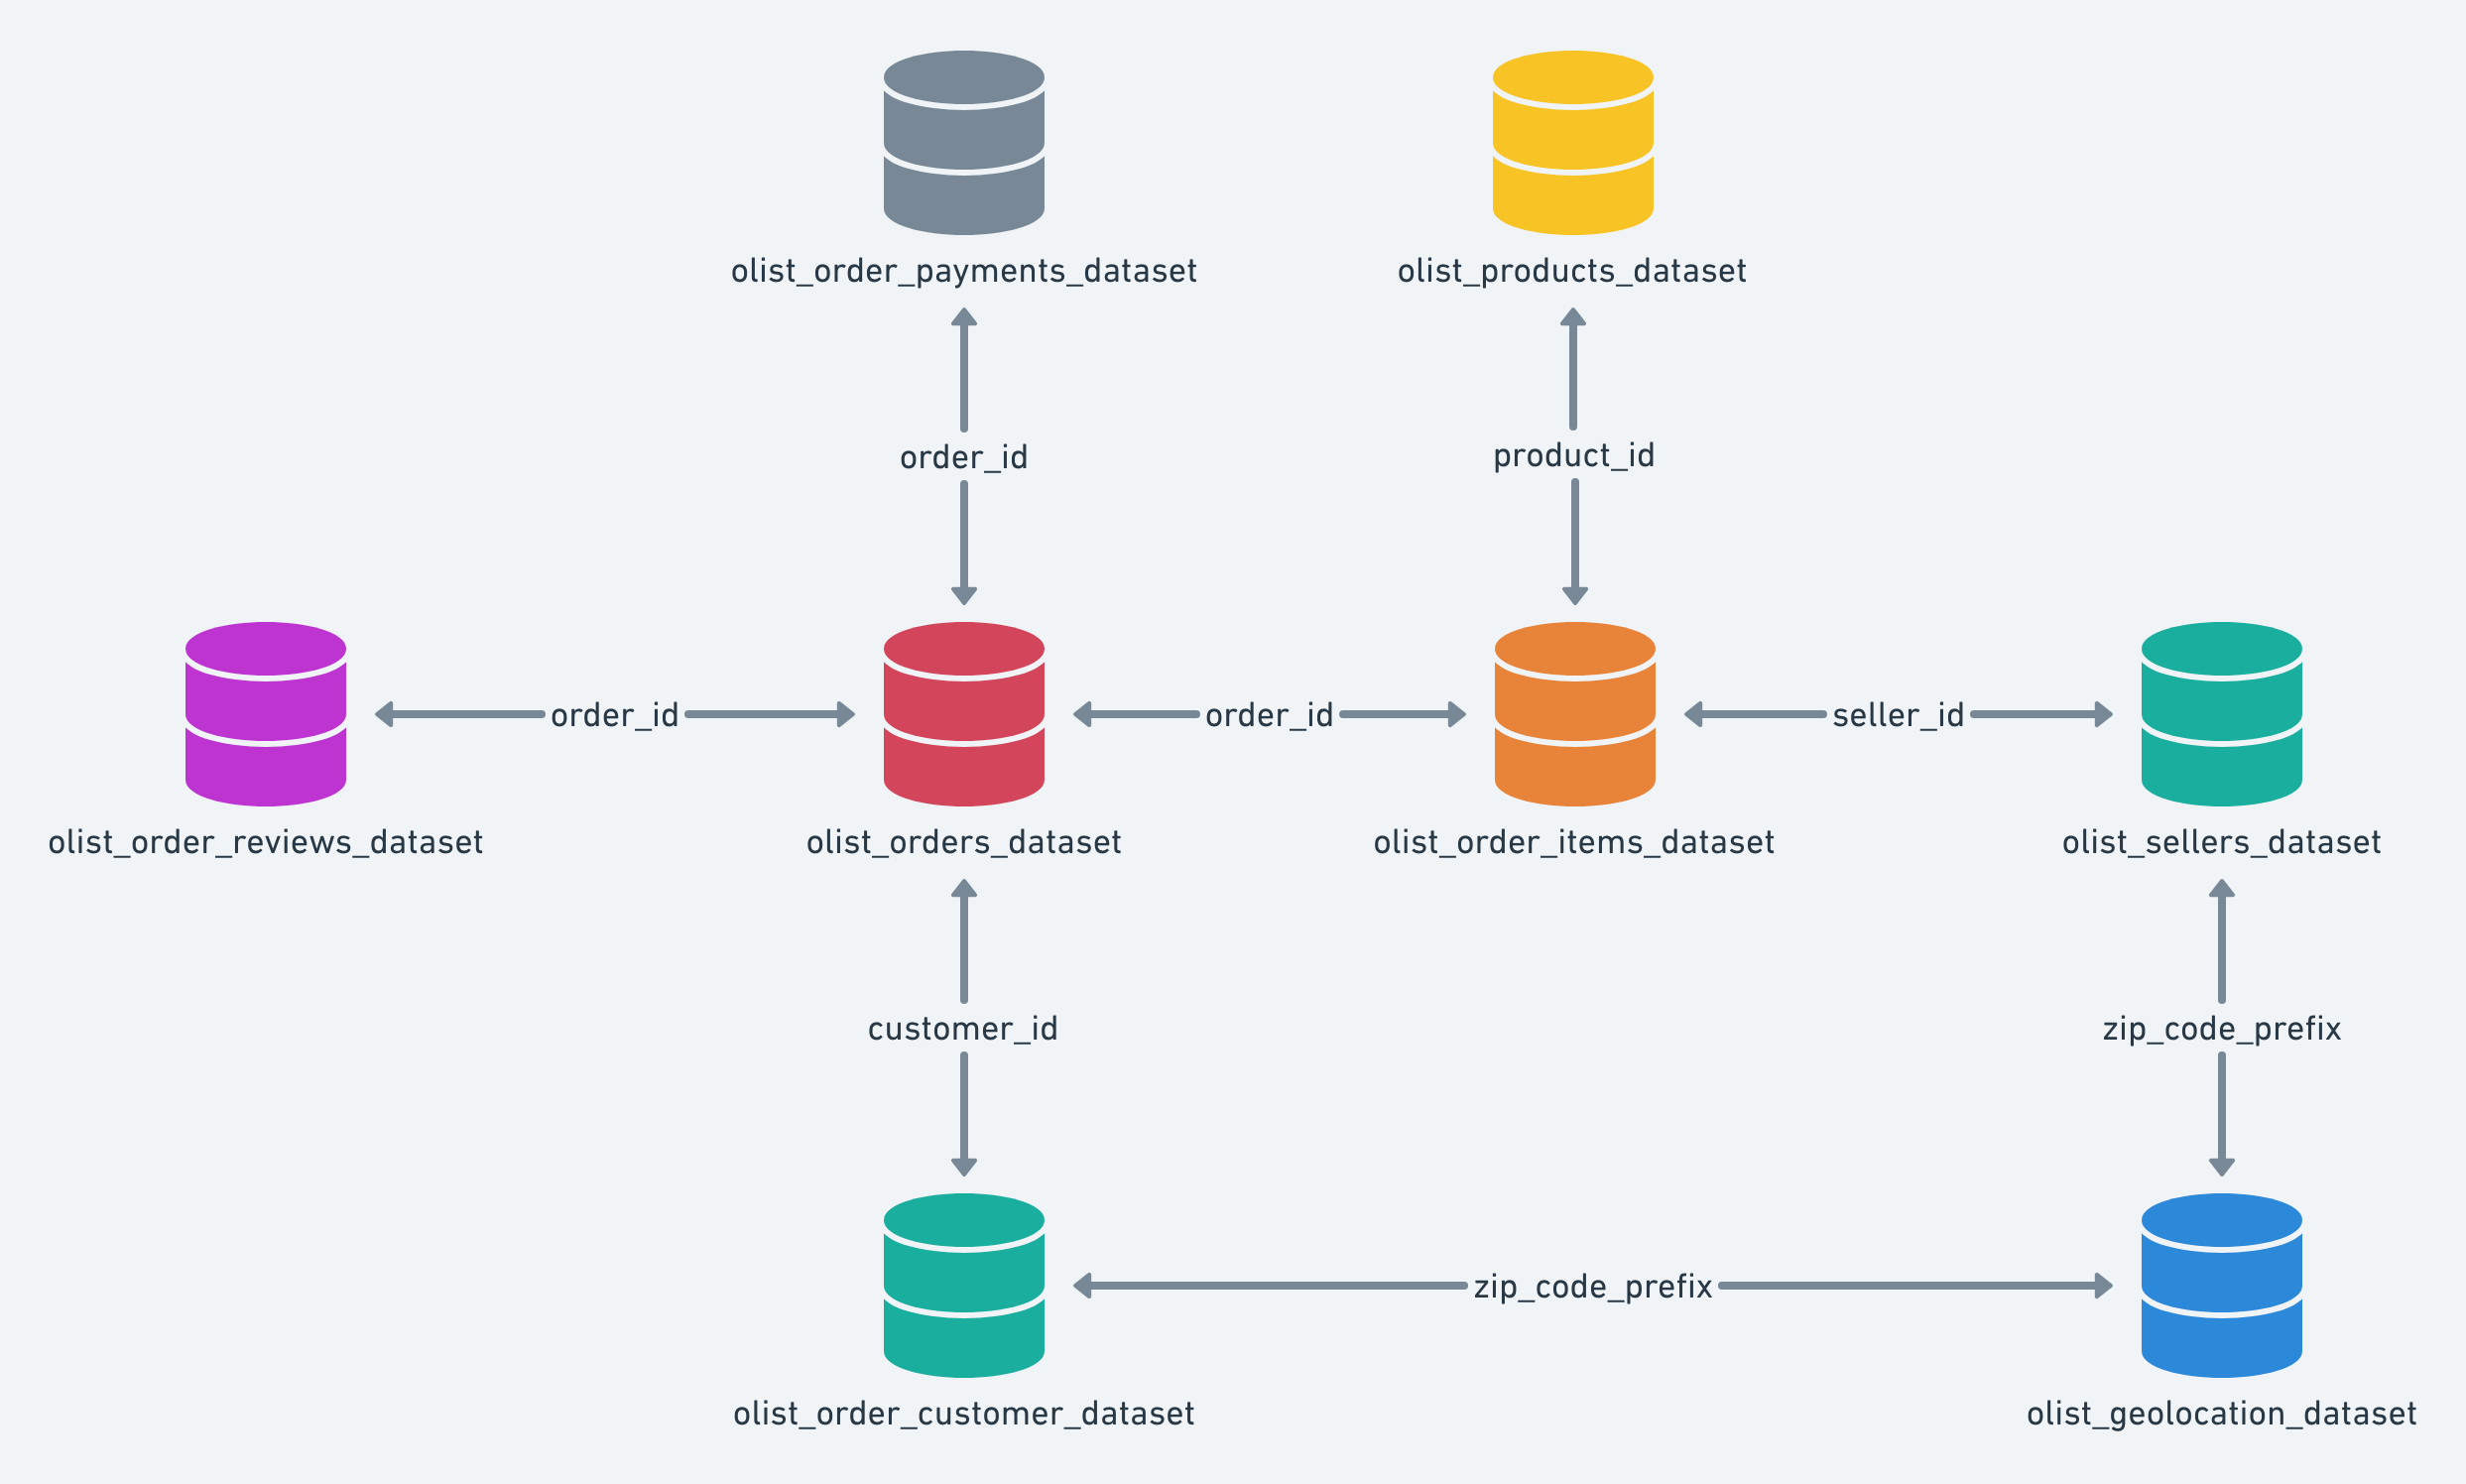

In [23]:
items = pd.merge(df_dict['items'],
                 df_dict['products'],
                 on='product_id')
items = pd.merge(items,
                 df_dict['category'],
                 on='product_category_name',
                 how='left')
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,furniture_decor
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0,watches_gifts
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,sports_leisure


In [24]:
duplicate = items.duplicated(subset='order_id', keep=False)
sort = ['order_id', 'order_item_id']

items[duplicate].sort_values(by=sort).head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
588,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
589,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
1315,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1316,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1317,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1540,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1541,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1542,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1763,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,beleza_saude,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty
1764,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,beleza_saude,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty


### 3.1 Processing of df_order_items

Group order item id into order id by aggregating the data to the most relevant.

In [25]:
col = 'product_category_name_english'
items[col][items[col].isna()] = 'unknown'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
col = ['product_name_lenght',
       'product_description_lenght',
       'product_photos_qty',
       'product_weight_g',
       'product_length_cm',
       'product_height_cm',
       'product_width_cm']

items[col] = items[col].fillna(0)

In [27]:
columns = ['order_item_id',
           'product_category_name_english',
           'product_photos_qty',
           'product_description_lenght',
           'price',
           'freight_value']

aggdict = {'order_item_id': lambda x: x.count(),
           'product_category_name_english': lambda x: x.value_counts().index[0],
           'product_photos_qty': lambda x: x.value_counts().index[0],
           'product_description_lenght': lambda x: x.value_counts().index[0],
           'price': lambda x: x.sum(),
           'freight_value': lambda x: x.sum()}

order_items = items.groupby('order_id')[columns].agg(aggdict)\
                                  .sort_values(by='order_item_id')

order_items = order_items.rename(columns={'order_item_id': 'n_item',
                                          'price': 'order_amount',
                                          'freight_value': 'freight_amount'})
order_items

,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff,4.0,598.0,58.90,13.29
a6e9d106235bcf1dda54253686d89e99,1,computers_accessories,1.0,258.0,89.00,16.38
a6e9b80a7636eb8dd592dbb3e20d0a91,1,agro_industry_and_commerce,2.0,388.0,465.00,25.79
a6e963c11e80432334e984ead4797a8b,1,watches_gifts,7.0,539.0,49.00,14.10
a6e8ad5db31e71f5f12671af561acb4a,1,health_beauty,1.0,507.0,17.00,12.43
...,...,...,...,...,...,...
428a2f660dc84138d969ccd69a0ab6d5,15,furniture_decor,2.0,1744.0,982.35,243.30
9ef13efd6949e4573a18964dd1bbe7f5,15,garden_tools,2.0,369.0,765.00,18.00
1b15974a0141d54e36626dca3fdc731a,20,computers_accessories,1.0,452.0,2000.00,202.40


### 3.2 Processing of df_order_payments

In [28]:
duplicate = df_dict['payments'].duplicated(subset='order_id', keep=False)
sort = ['order_id', 'payment_sequential']
df_dict['payments'][duplicate].sort_values(by=sort).head(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45


In [29]:
payments = df_dict['payments']
payments['payment_type_bis'] = payments['payment_type']

columns = ['payment_sequential',
           'payment_type',
           'payment_type_bis',
           'payment_value']

aggdict = {'payment_sequential': lambda x: x.count(),
           'payment_type': lambda x: x.value_counts().index[0],
           'payment_type_bis': lambda x: x.nunique(),
           'payment_value': lambda x: x.sum()}

order_payments = payments.groupby('order_id')[columns].agg(aggdict)


columns = {'payment_sequential': 'n_payment',
           'payment_type': 'prefered_payment',
           'payment_type_bis': 'n_payment_type',
           'payment_value': 'total_paid'}

order_payments = order_payments.rename(columns=columns)

order_payments

,n_payment,prefered_payment,n_payment_type,total_paid
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,1,72.19
00018f77f2f0320c557190d7a144bdd3,1,credit_card,1,259.83
000229ec398224ef6ca0657da4fc703e,1,credit_card,1,216.87
00024acbcdf0a6daa1e931b038114c75,1,credit_card,1,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,1,218.04
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,credit_card,1,116.85


### 3.3 Processing of  df_order_reviews

In [30]:
order_reviews = df_dict['reviews']\
                                .sort_values(by=['order_id',
                                                 'review_answer_timestamp'])\
                                .drop_duplicates(subset='order_id',
                                                 keep='last')
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52372,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
28025,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
4244,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
39133,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
56106,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...
48559,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
21844,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
37790,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
50858,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


### 3.4 Processing of  df_order

In [31]:
orders = df_dict['orders']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
timestamp = ['order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

for t in timestamp:
    orders[t] = pd.to_datetime(orders[t],
                               format="%Y-%m-%d %H:%M:%S")

In [33]:
orders['delay_delivery'] = orders.order_estimated_delivery_date - orders.order_delivered_customer_date
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58


### 3.5 Merging off the files

In [34]:
# Base
display(orders.shape)

# Merging with customer
df_orders_raw = pd.merge(orders,
                     df_dict['customers'],
                     on='customer_id')
display(df_orders_raw.shape)

# Merging with items
df_orders_raw = pd.merge(df_orders_raw,
                     order_items,
                     on='order_id',
                     how='outer')
display(df_orders_raw.shape)

# Merging with payments
df_orders_raw = pd.merge(df_orders_raw,
                     order_payments,
                     on='order_id',
                     how='outer')
display(df_orders_raw.shape)

# Merging with reviews
df_orders_raw = pd.merge(df_orders_raw,
                     order_reviews,
                     on='order_id',
                     how='outer')
display(df_orders_raw.shape)

# Display of the dataset
df_orders_raw

(99441, 9)

(99441, 13)

(99441, 19)

(99441, 23)

(99441, 29)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_delivery,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,housewares,4.0,268.0,29.99,8.72,3.0,voucher,2.0,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,perfumery,1.0,178.0,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,auto,1.0,232.0,159.90,19.22,1.0,credit_card,1.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,pet_shop,3.0,468.0,45.00,27.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,stationery,4.0,316.0,19.90,8.72,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,health_beauty,1.0,1517.0,72.00,13.08,1.0,credit_card,1.0,85.08,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,baby,4.0,828.0,174.90,20.10,1.0,credit_card,1.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,home_appliances_2,2.0,500.0,205.99,65.02,1.0,credit_card,1.0,271.01,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf

In [35]:
columns = ['order_id',
           'order_status',
           'order_purchase_timestamp',
           'order_estimated_delivery_date',
           'order_delivered_customer_date',
           'delay_delivery',
           'customer_unique_id',
           'n_item',
           'product_category_name_english',
           'product_photos_qty',
           'product_description_lenght',
           'order_amount',
           'freight_amount',
           'n_payment',
           'prefered_payment',
           'n_payment_type',
           'total_paid',
           'review_score']

df_orders = df_orders_raw[columns].copy()

df_orders.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,delay_delivery,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,7 days 02:34:47,7c396fd4830fd04220f754e42b4e5bff,1.0,housewares,4.0,268.0,29.99,8.72,3.0,voucher,2.0,38.71,4
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-13,2018-08-07 15:27:45,5 days 08:32:15,af07308b275d755c9edb36a90c618231,1.0,perfumery,1.0,178.0,118.70,22.76,1.0,boleto,1.0,141.46,4
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-09-04,2018-08-17 18:06:29,17 days 05:53:31,3a653a41f6f9fc3d2a113cf8398680e8,1.0,auto,1.0,232.0,159.90,19.22,1.0,credit_card,1.0,179.12,5
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-12-15,2017-12-02 00:28:42,12 days 23:31:18,7c142cf63193a1473d2e66489a9ae977,1.0,pet_shop,3.0,468.0,45.00,27.20,1.0,credit_card,1.0,72.20,5
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-26,2018-02-16 18:17:02,9 days 05:42:58,72632f0f9dd73dfee390c9b22eb56dd6,1.0,stationery,4.0,316.0,19.90,8.72,1.0,credit_card,1.0,28.62,5


## 4. Data Description
#### *Data Information*

In [36]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   order_status                   99441 non-null  object         
 2   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 3   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 4   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 5   delay_delivery                 96476 non-null  timedelta64[ns]
 6   customer_unique_id             99441 non-null  object         
 7   n_item                         98666 non-null  float64        
 8   product_category_name_english  98666 non-null  object         
 9   product_photos_qty             98666 non-null  float64        
 10  product_description_lenght     98666 non-null  float64        
 11  or

#### *Show statistical analysis of our data set*

In [37]:
df_orders.describe()

,delay_delivery,n_item,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,n_payment_type,total_paid,review_score
count,96476,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,99440.000000,99440.000000,99440.000000,99441.000000
mean,11 days 04:17:55.957616425,1.141731,2.217096,782.645633,137.754076,22.823562,1.044710,1.022586,160.990267,4.070796
std,10 days 04:28:00.181984555,0.538452,1.753466,656.376905,210.645145,21.650909,0.381166,0.148582,221.951257,1.359783
min,-189 days +00:35:53,1.000000,0.000000,0.000000,0.850000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,6 days 09:21:36,1.000000,1.000000,341.000000,45.900000,13.850000,1.000000,1.000000,62.010000,4.000000
50%,11 days 22:46:28.500000,1.000000,1.000000,600.000000,86.900000,17.170000,1.000000,1.000000,105.290000,5.000000
75%,16 days 05:51:54.750000,1.000000,3.000000,989.000000,149.900000,24.040000,1.000000,1.000000,176.970000,5.000000
max,146 days 00:23:13,21.000000,20.000000,3992.000000,13440.000000,1794.960000,29.000000,2.000000,13664.080000,5.000000


#### *Show if there are missing datapoints*

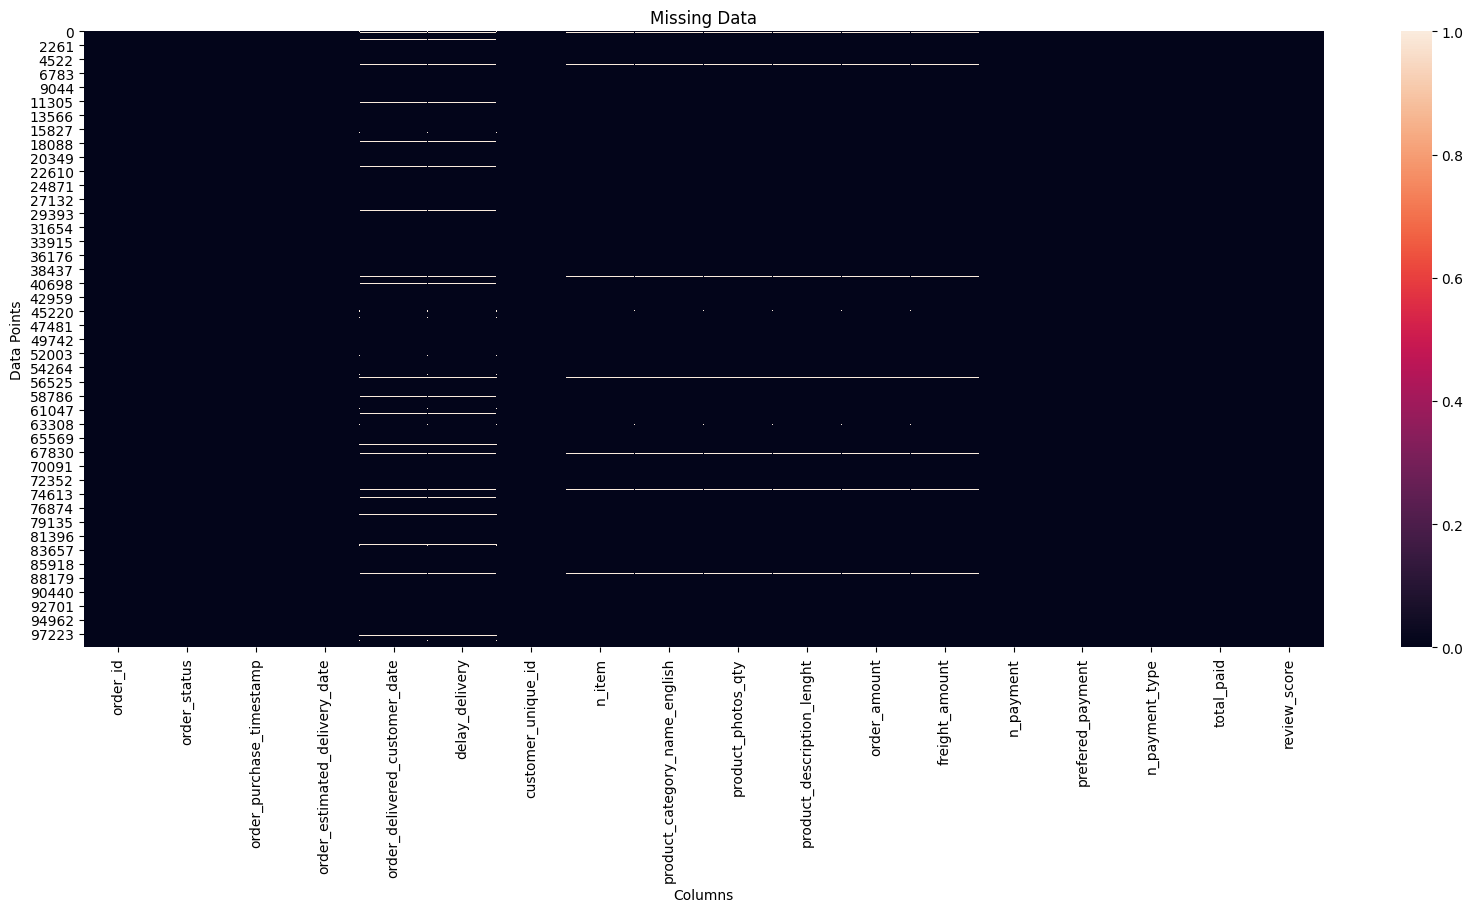

In [38]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df_orders.isnull(), ax=ax).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.show()

In [39]:
obj = df_orders.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

order_id , 0.0
order_status , 0.0
order_purchase_timestamp , 0.0
order_estimated_delivery_date , 0.0
order_delivered_customer_date , 2.98
delay_delivery , 2.98
customer_unique_id , 0.0
n_item , 0.7799999999999999
product_category_name_english , 0.7799999999999999
product_photos_qty , 0.7799999999999999
product_description_lenght , 0.7799999999999999
order_amount , 0.7799999999999999
freight_amount , 0.7799999999999999
n_payment , 0.0
prefered_payment , 0.0
n_payment_type , 0.0
total_paid , 0.0
review_score , 0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


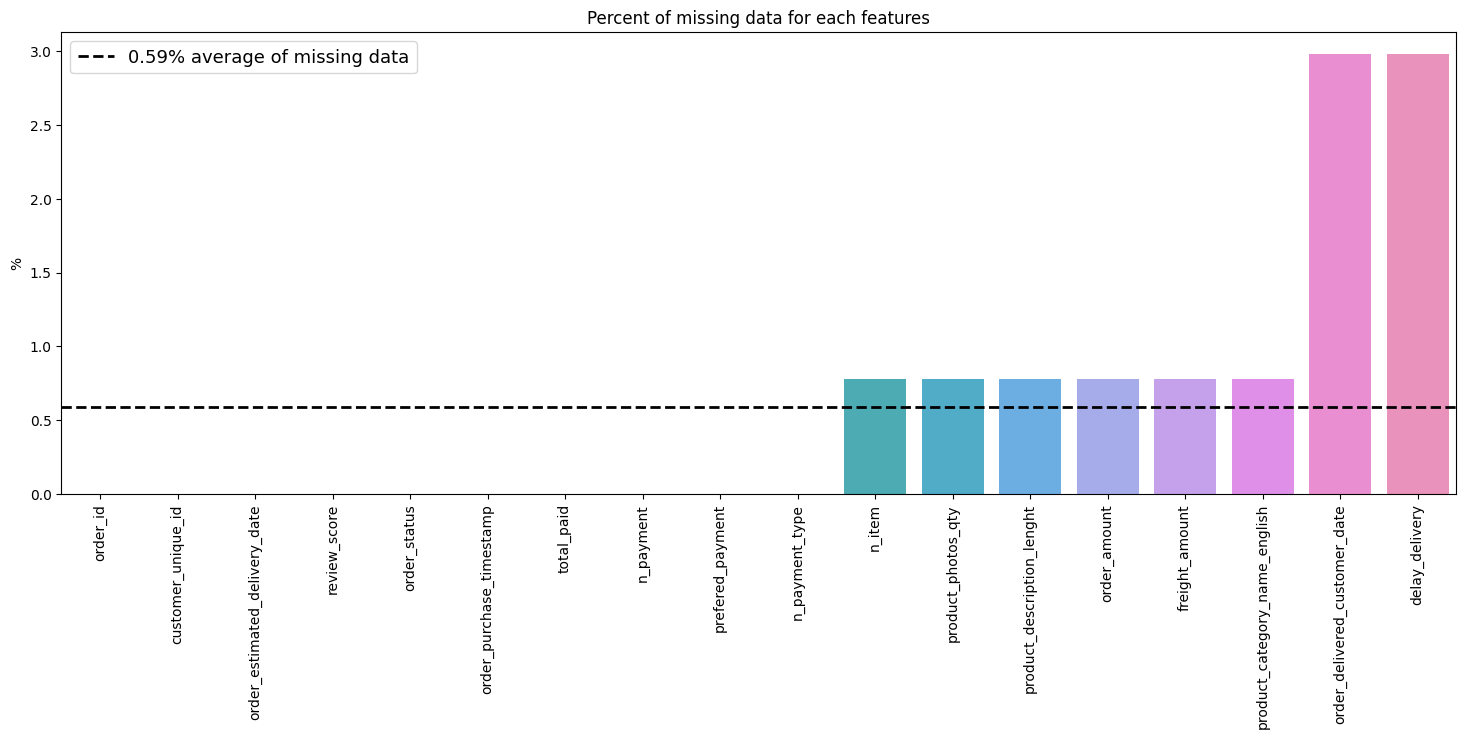

In [40]:
fig = plt.figure(figsize=(18,6))

null_prop = df_orders.isnull().sum(axis=0).sum()/len(df_orders)/len(df_orders.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% average of missing data'.format(null_prop)], fontsize=13)

null = df_orders.isnull().sum(axis=0).sort_values()/len(df_orders)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Percent of missing data for each features")
plt.xticks(rotation=90)
plt.show()

## 5. Data Cleaning


### 5.1 Missing Values
#### *Colums/Features*

In [41]:
df_orders[df_orders.n_item.isna()]


,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,delay_delivery,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-12-05,NaT,NaT,41fc647b8c6bd979b1b6364b60471b50,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,84.00,1
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-02-16,NaT,NaT,0e634b16e4c585acbd7b2e8276ce6677,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,97.68,3
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-09-05,NaT,NaT,596ed6d7a35890b3fbac54ec01f69685,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,132.46,1
737,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-02-06,NaT,NaT,2349bbb558908e0955e98d47dacb7adb,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,134.38,1
1130,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,2018-09-12,NaT,NaT,4fa4365000c7090fcb8cad5713c6d3db,NaN,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:59,2018-02-06,NaT,NaT,a33e0969408919ba06779f497ead93ec,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,210.09,1
99283,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44,2018-10-01,NaT,NaT,e90598185d2427a35e32ef241a5c04aa,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,63.89,5
99347,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:47,2018-09-27,NaT,NaT,d05c44a138277ad325d915c6b7ccbcdf,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,107.13,4
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04,2017-09-15,NaT,NaT,e72a90a2b29fe1a8795b284aaaa3246f,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,195.91,1


In [42]:
display(df_orders.order_status[df_orders.n_item.isna()].value_counts())
print('\n')
display(df_orders.prefered_payment[df_orders.n_item.isna()].value_counts())
print('\n')
display(df_orders.review_score[df_orders.n_item.isna()].value_counts())

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

credit_card    509
boleto         170
voucher         86
debit_card       7
not_defined      3
Name: prefered_payment, dtype: int64

1    554
5     71
2     64
3     53
4     33
Name: review_score, dtype: int64

In [43]:
round(len(df_orders[df_orders.n_item.isna()]) / len(df_orders) * 100, 2)

0.78

I find orders without shopping cart. Most of them are normally delivered and paid by credit card.

There is some uncertainty regarding the processing of these orders paid by the customer and without shopping cart. Is this a software issue? Have they actually been paid for? Were customers actually delivered?

The proportion of this uncertainty represents 2.2% of the data set. I decide to discard it.

In [44]:
df_orders = df_orders[df_orders.n_item.notna()]
df_orders.isna().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
order_delivered_customer_date    2190
delay_delivery                   2190
customer_unique_id                  0
n_item                              0
product_category_name_english       0
product_photos_qty                  0
product_description_lenght          0
order_amount                        0
freight_amount                      0
n_payment                           1
prefered_payment                    1
n_payment_type                      1
total_paid                          1
review_score                        0
dtype: int64

I also find an order without payment. In doubt and for an observation, I discard it.

In [45]:
df_orders[df_orders.total_paid.isna()]


,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,delay_delivery,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
30710,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-10-04,2016-11-09 07:47:38,-37 days +16:12:22,830d5b7aaa3b6f1e9ad63703bec97d23,3.0,health_beauty,1.0,1036.0,134.97,8.49,NaN,NaN,NaN,NaN,1


In [46]:
df_orders = df_orders[df_orders.total_paid.notna()]
df_orders.isna().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
order_delivered_customer_date    2190
delay_delivery                   2190
customer_unique_id                  0
n_item                              0
product_category_name_english       0
product_photos_qty                  0
product_description_lenght          0
order_amount                        0
freight_amount                      0
n_payment                           0
prefered_payment                    0
n_payment_type                      0
total_paid                          0
review_score                        0
dtype: int64

### 5.2 Inconsistent Data


In [47]:
balance = df_orders['order_amount'] + df_orders['freight_amount'] - df_orders['total_paid']
balance.value_counts()

 0.000000e+00    78995
 1.421085e-14     4022
-7.105427e-15     3752
 2.842171e-14     3253
-1.421085e-14     2878
                 ...  
-8.300000e+00        1
-2.530000e+00        1
-1.363000e+01        1
-1.052000e+01        1
-9.700000e+00        1
Length: 310, dtype: int64

In [48]:
df_orders[round((df_orders['order_amount'] + df_orders['freight_amount']), 2) != round(df_orders.total_paid, 2)]

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,delay_delivery,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
306,f04bfdbef5359607d39e66fccc9cc0de,delivered,2017-09-13 15:07:45,2017-10-04,2017-09-22 16:48:51,11 days 07:11:09,74182c655b0270d9dde23ca43bb16a2e,4.0,construction_tools_safety,3.0,335.0,721.50,277.00,1.0,credit_card,1.0,998.49,1
464,8adafb3466daa5395694d3a906ff9d40,delivered,2017-01-25 15:47:27,2017-03-23,2017-02-14 14:03:35,36 days 09:56:25,6ad46014a4203440c38e3dbf7aedf51c,6.0,sports_leisure,1.0,593.0,168.00,50.02,1.0,credit_card,1.0,218.00,3
706,d5211af24819d319c02a285e7bb51750,delivered,2018-08-03 16:29:05,2018-09-05,2018-08-09 15:09:10,26 days 08:50:50,a5931be4783e1a1dfbda5c6e145d96bb,6.0,health_beauty,1.0,743.0,159.78,26.97,1.0,credit_card,1.0,186.76,4
867,bb2e64c3040ceb9b7ca2bfc602adca08,delivered,2017-11-03 11:29:00,2017-11-16,2017-11-08 02:42:06,7 days 21:17:54,45677f94e9a07652cc2eb351dd542476,4.0,bed_bath_table,1.0,252.0,248.00,9.36,1.0,credit_card,1.0,257.34,5
1080,84d6d9710c8af32b5e88f2d1c14ab871,delivered,2018-01-27 22:09:48,2018-02-14,2018-02-06 19:35:01,7 days 04:24:59,95cc7f48ae7cfa0afebd560092cdc92e,1.0,stationery,1.0,182.0,49.90,7.78,1.0,credit_card,1.0,61.70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99180,469f0b908881368c45917f1bed8240ce,delivered,2017-01-24 21:35:25,2017-03-23,2017-02-08 08:14:01,42 days 15:45:59,753edf44d14afd72110c66fb22b69c91,1.0,toys,3.0,361.0,66.99,17.21,1.0,credit_card,1.0,95.17,5
99193,87a71a39b50dac1a8ad74cddfaa82703,delivered,2018-01-30 10:22:13,2018-02-21,2018-02-02 20:12:36,18 days 03:47:24,6109a7fbc9a9010872da7936b99c5433,1.0,baby,4.0,518.0,59.99,13.44,1.0,credit_card,1.0,83.00,5
99281,63cb2376233663b05e9beb6bd9206c65,delivered,2017-07-03 23:02:33,2017-07-21,2017-07-10 19:25:34,10 days 04:34:26,bf71e1d9dd5f362875657a46ca04fb28,1.0,baby,2.0,506.0,59.50,13.44,1.0,credit_card,1.0,84.25,5
99312,f930a1f6247ed00d6fa9d8a09782c7b4,delivered,2018-06-05 12:28:11,2018-07-11,2018-06-07 17:28:31,33 days 06:31:29,5bc738a48bdb9ca1f798d56de2cce84c,5.0,garden_tools,2.0,340.0,249.50,103.57,1.0,credit_card,1.0,353.06,5


I also have 1352 orders whose total payment does not correspond to the total of the order, to the nearest cent. That said, this is not an issue and I won't dwell on it.

### 5.3 Unnecessary Data

#### 5.3.3 *Uninformative / Repetitive*

In [49]:
num_rows = len(df_orders.index)
low_information_cols = [] #

for col in df_orders.columns:
    cnts = df_orders[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.4:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

order_status: 97.78239%
delivered      96477
shipped         1106
canceled         461
invoiced         312
processing       301
unavailable        6
approved           2
Name: order_status, dtype: int64

n_item: 90.06537%
1.0     88863
2.0      7516
3.0      1321
4.0       505
5.0       204
6.0       198
7.0        22
8.0         8
10.0        8
12.0        5
11.0        4
9.0         3
20.0        2
14.0        2
15.0        2
21.0        1
13.0        1
Name: n_item, dtype: int64

product_photos_qty: 48.71738%
1.0     48067
2.0     19178
3.0     11190
4.0      7590
5.0      4962
6.0      3396
0.0      1416
7.0      1408
8.0       682
10.0      320
9.0       291
11.0       59
12.0       47
13.0       26
15.0       12
17.0        8
14.0        6
18.0        4
19.0        2
20.0        1
Name: product_photos_qty, dtype: int64

n_payment: 97.02427%
1.0     95729
2.0      2364
3.0       300
4.0       106
5.0        52
6.0        35
7.0        28
8.0        10
11.0        8
9.0         8


### 5.4 Outliers

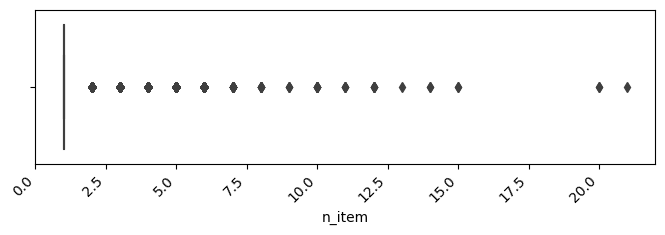

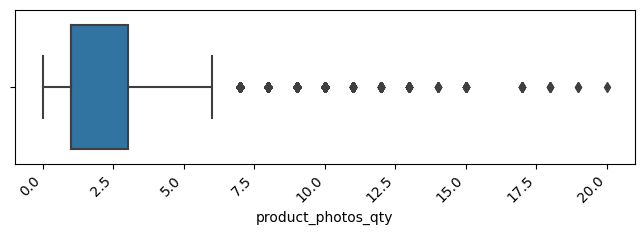

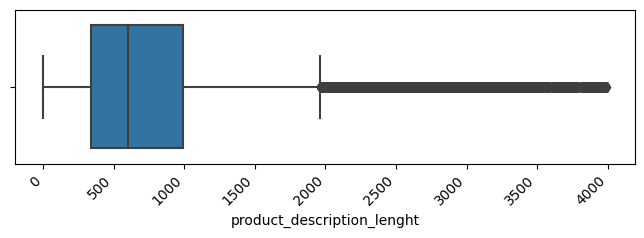

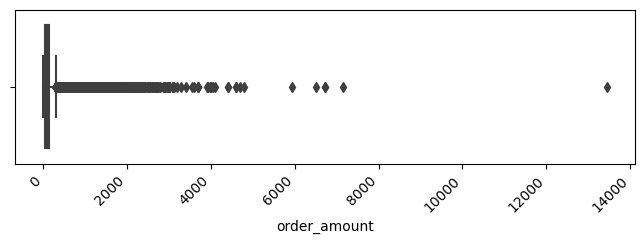

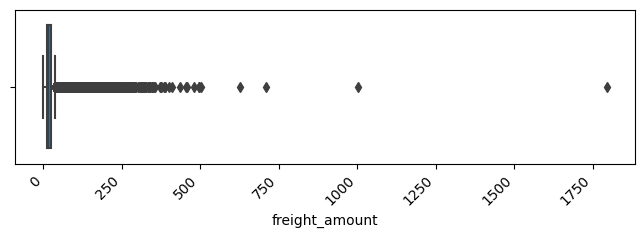

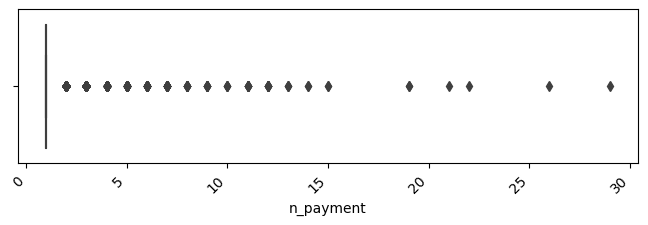

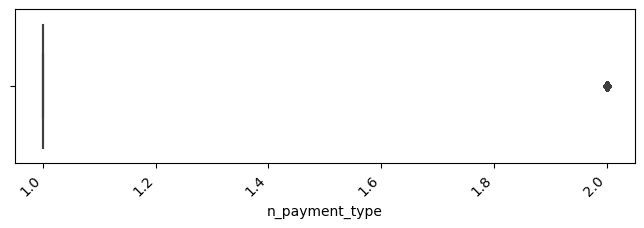

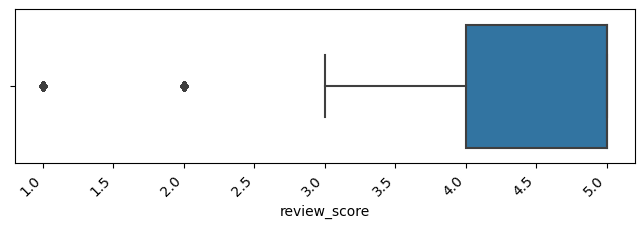

In [50]:
cols = ['n_item', 'product_photos_qty', 'product_description_lenght', 'order_amount', 'freight_amount', 'n_payment', 'n_payment_type', 'review_score']

for col in df_orders[cols].columns:
    fig = plt.figure(1, figsize=(8,2))
    sns.boxplot(data = df_orders,  x = col)
    plt.xticks(rotation=45, ha = "right")
    plt.show()

## 6. Features Engineering

In [51]:
df_orders['ratio_freight_amount'] = round(df_orders['freight_amount'] / df_orders['total_paid'], 2)
df_orders

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,delay_delivery,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score,ratio_freight_amount
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,7 days 02:34:47,7c396fd4830fd04220f754e42b4e5bff,1.0,housewares,4.0,268.0,29.99,8.72,3.0,voucher,2.0,38.71,4,0.23
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-13,2018-08-07 15:27:45,5 days 08:32:15,af07308b275d755c9edb36a90c618231,1.0,perfumery,1.0,178.0,118.70,22.76,1.0,boleto,1.0,141.46,4,0.16
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-09-04,2018-08-17 18:06:29,17 days 05:53:31,3a653a41f6f9fc3d2a113cf8398680e8,1.0,auto,1.0,232.0,159.90,19.22,1.0,credit_card,1.0,179.12,5,0.11
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-12-15,2017-12-02 00:28:42,12 days 23:31:18,7c142cf63193a1473d2e66489a9ae977,1.0,pet_shop,3.0,468.0,45.00,27.20,1.0,credit_card,1.0,72.20,5,0.38
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-26,2018-02-16 18:17:02,9 days 05:42:58,72632f0f9dd73dfee390c9b22eb56dd6,1.0,stationery,4.0,316.0,19.90,8.72,1.0,credit_card,1.0,28.62,5,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-28,2017-03-17 15:08:01,10 days 08:51:59,6359f309b166b0196dbf7ad2ac62bb5a,1.0,health_beauty,1.0,1517.0,72.00,13.08,1.0,credit_card,1.0,85.08,5,0.15
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-03-02,2018-02-28 17:37:56,1 days 06:22:04,da62f9e57a76d978d02ab5362c509660,1.0,baby,4.0,828.0,174.90,20.10,1.0,credit_card,1.0,195.00,4,0.10
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-27,2017-09-21 11:24:17,5 days 12:35:43,737520a9aad80b3fbbdad19b66b37b30,1.0,home_appliances_2,2.0,500.0,205.99,65.02,1.0,credit_card,1.0,271.01,5,0.24
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-02-15,2018-01-25 23:32:54,20 days 00:27:06,5097a5312c8b157bb7be58ae360ef43c,2.0,computers_accessories,1.0,1893.0,359.98,81.18,1.0,credit_card,1.0,441.16,2,0.18


I also create a feature that lets me know if the delivery time has been respected:
- 0 = Never received the package, either by canceled order, or never received the package or any reasons
- 1 = Received the package late
- 2 = Received the package within the required time frame

In [52]:
days = dt.timedelta(days=0)

df_orders['delivery_respect'] = 0
df_orders['delivery_respect'][df_orders['delay_delivery'] < days] = 1
df_orders['delivery_respect'][df_orders['delay_delivery'] >= days] = 2
round(df_orders.delivery_respect.value_counts(normalize=True), 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


2    0.90
1    0.08
0    0.02
Name: delivery_respect, dtype: float64

In [53]:
df_orders.drop(['order_estimated_delivery_date', 'order_delivered_customer_date'], axis=1, inplace=True)

In [54]:
df_orders

,order_id,order_status,order_purchase_timestamp,delay_delivery,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score,ratio_freight_amount,delivery_respect
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7 days 02:34:47,7c396fd4830fd04220f754e42b4e5bff,1.0,housewares,4.0,268.0,29.99,8.72,3.0,voucher,2.0,38.71,4,0.23,2
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,5 days 08:32:15,af07308b275d755c9edb36a90c618231,1.0,perfumery,1.0,178.0,118.70,22.76,1.0,boleto,1.0,141.46,4,0.16,2
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,17 days 05:53:31,3a653a41f6f9fc3d2a113cf8398680e8,1.0,auto,1.0,232.0,159.90,19.22,1.0,credit_card,1.0,179.12,5,0.11,2
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,12 days 23:31:18,7c142cf63193a1473d2e66489a9ae977,1.0,pet_shop,3.0,468.0,45.00,27.20,1.0,credit_card,1.0,72.20,5,0.38,2
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,9 days 05:42:58,72632f0f9dd73dfee390c9b22eb56dd6,1.0,stationery,4.0,316.0,19.90,8.72,1.0,credit_card,1.0,28.62,5,0.30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,10 days 08:51:59,6359f309b166b0196dbf7ad2ac62bb5a,1.0,health_beauty,1.0,1517.0,72.00,13.08,1.0,credit_card,1.0,85.08,5,0.15,2
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,1 days 06:22:04,da62f9e57a76d978d02ab5362c509660,1.0,baby,4.0,828.0,174.90,20.10,1.0,credit_card,1.0,195.00,4,0.10,2
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,5 days 12:35:43,737520a9aad80b3fbbdad19b66b37b30,1.0,home_appliances_2,2.0,500.0,205.99,65.02,1.0,credit_card,1.0,271.01,5,0.24,2
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,20 days 00:27:06,5097a5312c8b157bb7be58ae360ef43c,2.0,computers_accessories,1.0,1893.0,359.98,81.18,1.0,credit_card,1.0,441.16,2,0.18,2


I create a quarterly period feature

In [55]:
df_orders['period'] = df_orders.order_purchase_timestamp.dt.year.astype(str)\
                + '-Q'\
                + df_orders.order_purchase_timestamp.dt.quarter.astype(str)

## 4. EDA

In [56]:
df_orders.period.value_counts().sort_index()

2016-Q3        2
2016-Q4      309
2017-Q1     5163
2017-Q2     9268
2017-Q3    12505
2017-Q4    17643
2018-Q1    21102
2018-Q2    19947
2018-Q3    12726
Name: period, dtype: int64

Q3 and Q4 of the year 2016 show a very low number of orders compared to the other quarters. Therefore I decide to discard these periods.

In [57]:
list = ['2016-Q3', '2016-Q4']
for l in list:
    df_orders = df_orders[df_orders.period != l]

df_orders.period.value_counts().sort_index()

2017-Q1     5163
2017-Q2     9268
2017-Q3    12505
2017-Q4    17643
2018-Q1    21102
2018-Q2    19947
2018-Q3    12726
Name: period, dtype: int64

In [58]:
df_orders.order_status.value_counts()


delivered     96211
shipped        1098
canceled        448
processing      299
invoiced        296
approved          2
Name: order_status, dtype: int64

Concerning the status of orders, they are in the process of delivery, confirmed... The proportion of orders in progress being negligible, I decide to keep them.



In [59]:
display('KPI')
display(f'Customers : {df_orders.customer_unique_id.nunique()}')
display(f'Orders : {df_orders.order_id.nunique()}')
display(f'Total Sell Products : {df_orders.n_item.sum()}')

'KPI'

'Customers : 95121'

'Orders : 98354'

'Total Sell Products : 112280.0'

In [60]:
cutomer_order = df_orders.groupby(['customer_unique_id'])['order_id'].count()
round(cutomer_order.value_counts(normalize=True).head(5) * 100, 2)

1    96.95
2     2.80
3     0.20
4     0.03
5     0.01
Name: order_id, dtype: float64

Almost 97% of customers did not re-order a product in the same year.


In [61]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
# Récupération des mois de commandes
df_orders['order_purchase_month'] = df_orders.order_purchase_timestamp.apply(get_month)
# Récupération de la première date de commande pour le client
df_orders['cohort_month'] = (df_orders.groupby('customer_unique_id')
                         ['order_purchase_month'].transform('min'))

In [62]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

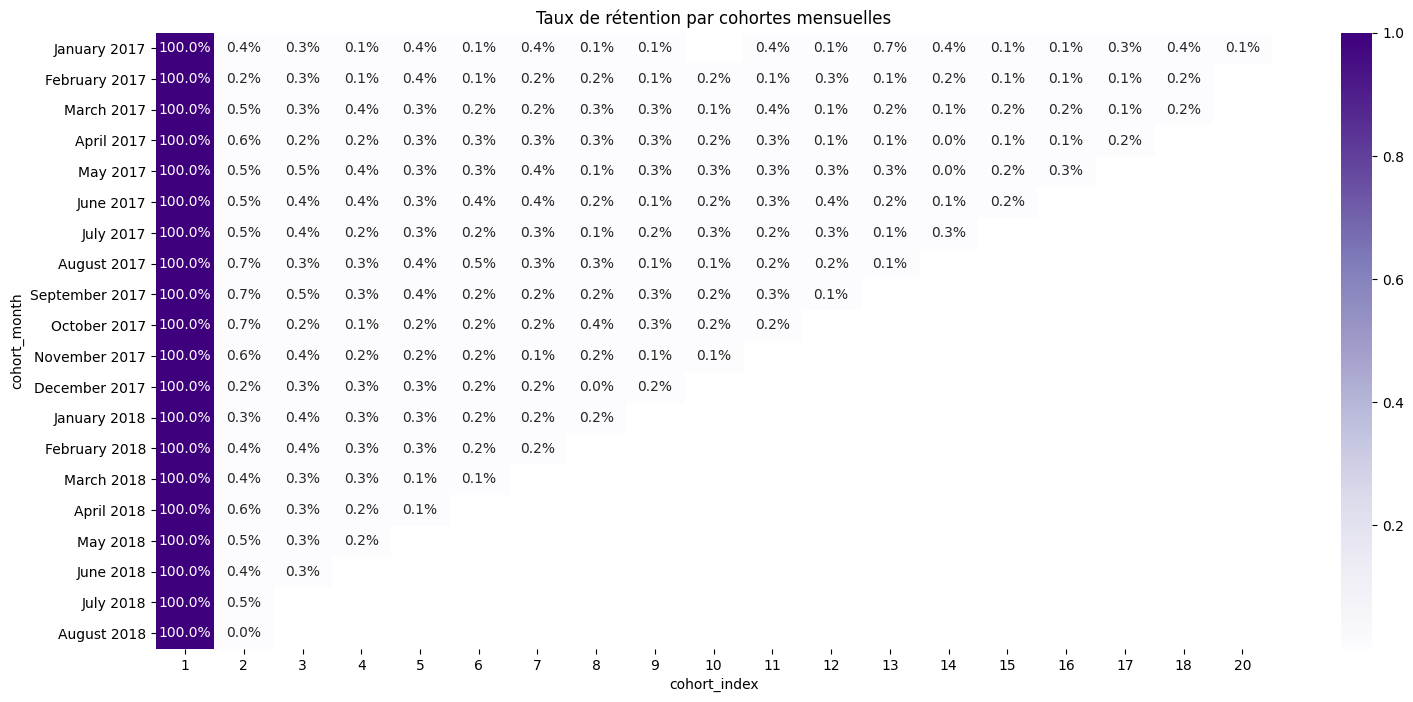

In [63]:
order_purchase_year, order_purchase_month, _ = get_date_int(df_orders, 'order_purchase_month')

cohort_year, cohort_month, _ = get_date_int(df_orders, 'cohort_month')

years_diff = order_purchase_year - cohort_year
months_diff = order_purchase_month - cohort_month

df_orders['cohort_index'] = years_diff * 12 + months_diff + 1

# Construction du tableau pivoté pour observé le taux de rétention
cohort_data = (df_orders.groupby(['cohort_month', 'cohort_index'])
               ['customer_unique_id'].apply(pd.Series.nunique).reset_index())
cohort_counts = cohort_data.pivot(index='cohort_month',
                                  columns='cohort_index',
                                  values='customer_unique_id')

# Taux de rétention par cohortes mensuelles
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index = retention.index.strftime('%B %Y')

# Affichage du tableau
plt.figure(figsize=(18, 8))
plt.title('Taux de rétention par cohortes mensuelles')
sns.heatmap(retention,
            annot=True,
            fmt='.1%',
            cmap='Purples')

In [64]:
df_orders

,order_id,order_status,order_purchase_timestamp,delay_delivery,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score,ratio_freight_amount,delivery_respect,period,order_purchase_month,cohort_month,cohort_index
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7 days 02:34:47,7c396fd4830fd04220f754e42b4e5bff,1.0,housewares,4.0,268.0,29.99,8.72,3.0,voucher,2.0,38.71,4,0.23,2,2017-Q4,2017-10-01,2017-09-01,2
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,5 days 08:32:15,af07308b275d755c9edb36a90c618231,1.0,perfumery,1.0,178.0,118.70,22.76,1.0,boleto,1.0,141.46,4,0.16,2,2018-Q3,2018-07-01,2018-07-01,1
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,17 days 05:53:31,3a653a41f6f9fc3d2a113cf8398680e8,1.0,auto,1.0,232.0,159.90,19.22,1.0,credit_card,1.0,179.12,5,0.11,2,2018-Q3,2018-08-01,2018-08-01,1
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,12 days 23:31:18,7c142cf63193a1473d2e66489a9ae977,1.0,pet_shop,3.0,468.0,45.00,27.20,1.0,credit_card,1.0,72.20,5,0.38,2,2017-Q4,2017-11-01,2017-11-01,1
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,9 days 05:42:58,72632f0f9dd73dfee390c9b22eb56dd6,1.0,stationery,4.0,316.0,19.90,8.72,1.0,credit_card,1.0,28.62,5,0.30,2,2018-Q1,2018-02-01,2018-02-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,10 days 08:51:59,6359f309b166b0196dbf7ad2ac62bb5a,1.0,health_beauty,1.0,1517.0,72.00,13.08,1.0,credit_card,1.0,85.08,5,0.15,2,2017-Q1,2017-03-01,2017-03-01,1
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,1 days 06:22:04,da62f9e57a76d978d02ab5362c509660,1.0,baby,4.0,828.0,174.90,20.10,1.0,credit_card,1.0,195.00,4,0.10,2,2018-Q1,2018-02-01,2018-02-01,1
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,5 days 12:35:43,737520a9aad80b3fbbdad19b66b37b30,1.0,home_appliances_2,2.0,500.0,205.99,65.02,1.0,credit_card,1.0,271.01,5,0.24,2,2017-Q3,2017-08-01,2017-08-01,1
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,20 days 00:27:06,5097a5312c8b157bb7be58ae360ef43c,2.0,computers_accessories,1.0,1893.0,359.98,81.18,1.0,credit_card,1.0,441.16,2,0.18,2,2018-Q1,2018-01-01,2018-01-01,1


In [65]:
columns = ['order_id',
           'order_status',
           'order_purchase_timestamp',
           'delivery_respect',
           'period',
           'customer_unique_id',
           'n_item',
           'product_category_name_english',
           'product_photos_qty',
           'product_description_lenght',
           'order_amount',
           'freight_amount',
           'ratio_freight_amount',
           'n_payment',
           'prefered_payment',
           'total_paid',
           'review_score']

df_orders[columns].head()

,order_id,order_status,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,product_category_name_english,product_photos_qty,product_description_lenght,order_amount,freight_amount,ratio_freight_amount,n_payment,prefered_payment,total_paid,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2,2017-Q4,7c396fd4830fd04220f754e42b4e5bff,1.0,housewares,4.0,268.0,29.99,8.72,0.23,3.0,voucher,38.71,4
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2,2018-Q3,af07308b275d755c9edb36a90c618231,1.0,perfumery,1.0,178.0,118.70,22.76,0.16,1.0,boleto,141.46,4
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2,2018-Q3,3a653a41f6f9fc3d2a113cf8398680e8,1.0,auto,1.0,232.0,159.90,19.22,0.11,1.0,credit_card,179.12,5
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2,2017-Q4,7c142cf63193a1473d2e66489a9ae977,1.0,pet_shop,3.0,468.0,45.00,27.20,0.38,1.0,credit_card,72.20,5
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2,2018-Q1,72632f0f9dd73dfee390c9b22eb56dd6,1.0,stationery,4.0,316.0,19.90,8.72,0.30,1.0,credit_card,28.62,5


In [66]:
df_orders.to_csv('df_olist_modelization.csv')
!cp df_olist_modelization.csv "/content/drive/My Drive/OC_DataScientist/P5/"